In [ ]:
                                                                    ##  4º Biotecnología 
                                                                    ## Carlos Llopis Juan

In [1]:
## Introducción
Mediante un extenso análisis, realizado por Viscardi *et al.*(2021), sobre los orígenes evolutivos de las familias proteicas que en humanos participan en la 
neurotransmisión, se ha detectado que la mayor parte de estos genes se originaron es una etapa muy temprana de la evolución eucariota, además, según el mismo
artículo, se piensa que estas proteínas aparecieron en el linaje del último ancestro común entre cordados y cnidarios, es decir, no se deberían conocer proteínas 
homólogas a ctenóforos, poríferos, placozoa, hongos ni plantas.

Por ello, el objetivo de este análisis es explorar la distribución taxonómica de las secuencias homólogas al receptor muscarínico de acetilcolina CHRM1 de 
*Homo sapiens* a fin de verificar que esta proteína , o bien sus proteínas homólogas, se encuentran conservadas en los dominios cercanos al filo de los 
cordados, pero no en los citados anteriormente.

## Métodos
La base de datos de secuencias utilizada es Swissprot, ya que es una base de datos de proteínas ya instalada en este ambiente.

También se hará uso de *blastp* con diferentes valores umbrales de E, para determinar a qué ritmo aumenta la distribución taxonómica de las secuencias 
encontradas a medida que se relaja el grado de similitud exigido.

## Resultados
### BLASTP individual
Primero, se ejecuta una búsqueda con **blastp**, usando un valor umbral E de 1.0e-80, el cual es muy exigente, provocando que R solo nos devuelva las
secuencias extremadamente parecidas a la original.


ERROR: Error in parse(text = x, srcfile = src): <text>:2:10: unexpected symbol
1: ## Introducción
2: Mediante un
            ^


In [3]:
#Para preparar el ambiente de computación, hace falta ejecutar el script 'preparar_ambiente.sh', donde estan los comandos necesarios para instalar
#BLAST y descomprimir el archivo taxdb.btd.gz.
system2(command = './preparar_ambiente.sh', wait = TRUE)

In [4]:
BlastpOut01 <- system2(command = 'blastp',
                      args = c('-db', 'swissprot',
                              '-query', 'CHRM1.fas',
                              '-evalue', '1.0e-80',
                              '-outfmt', '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                      stdout = TRUE)

#Como el vector "BlastOut01" esta guardado en formato texto plano, vamos a utilizar las funciones textConnection() y read.table() para transformar este
#en un "data.frame", una tabla donde cada columna es una variable.
TablaOut01 <- read.table(textConnection(BlastpOut01),
                        sep = '\t',
                        col.names = c('saccver', 'pident', 'length', 'qstart',
                                     'qend', 'sstart', 'send', 'evalue', 'staxid',
                                     'ssciname', 'sblastname'))
# Dimensiones de la tabla:
dim(TablaOut01)

[1] 32 11

In [5]:
TablaOut01

saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
P11229.2,100.000,460,1,460,1,460,0.00e+00,9606,Homo sapiens,primates
P56489.1,99.565,460,1,460,1,460,0.00e+00,9544,Macaca mulatta,primates
Q5R949.1,99.565,460,1,460,1,460,0.00e+00,9601,Pongo abelii,primates
P04761.1,99.130,460,1,460,1,460,0.00e+00,9823,Sus scrofa,even-toed ungulates
P12657.2,98.913,460,1,460,1,460,0.00e+00,10090,Mus musculus,rodents
P08482.1,98.696,460,1,460,1,460,0.00e+00,10116,Rattus norvegicus,rodents
Q9N2A4.1,51.731,520,10,438,51,564,1.14e-170,9598,Pan troglodytes,primates
P20309.1,51.731,520,10,438,51,564,2.19e-170,9606,Homo sapiens,primates
Q9N2A3.1,51.737,518,10,436,51,562,1.08e-169,9595,Gorilla gorilla gorilla,primates


In [ ]:
La tabla de resultados incluye 32 secuencias encontradas, incluyendo la misma secuencia usada como *query*. Las columnas de la tabla són:

- **saccver**: número de acceso o identificador de la secuencia encontrada (*subject*).
- **pident**: porcentaje de identidad entre la *query* y el *subject* en su alineamiento local.
- **length**: longitud del alineamiento entre *query* y *subject*.
- **qstart**: primera posición de la *query* alineada.
- **qend**: última posición alineada en la *query*.
- **sstart**: primera posición de la *subject* alineada.
- **send**: última posición de la *subject* alineada.
- **evalue**: valor E del alineamiento. Es decir, número de alineamientos de igual o mejor puntuación esperados por azar en una base de datos igual de grande.
- **staxid**: identificador de la especie a la que pertenece la *subject*, en la base de datos de taxonomía del NCBI.
- **ssciname**: nombre científico de la especie a la que pertenece la *subject*.
- **sblastname**: nombre de un grupo taxonómico de rango superior al que pertenece la *subject*, usado para facilitar la interpretación.

### BLASTP en serie
Para ver cómo aumenta el número de secuencias a medida que aumenta el valor umbral de E, debemos repetir la búsqueda unas cuantas veces (en nuestro caso,
alrededor de 10), con valores del parámetro `-evalue` diferentes. Para agilizar el proceso, vamos a utilizar la función `lappy()`, de manera que el siguiente 
código ejecutará una búsqueda de *blastp* para cada valor del vector `Valores_E_maximos`. El resultado será una lista de tablas, como la anterior. 


In [6]:
Valores_E_maximos <- c('1.0e-80', '1.0e-70', '1.0e-60', '1.0e-50', '1.0e-40',
                       '1.0e-30', '1.0e-25', '1.0e-20', '1.0e-15', '1.0e-10')

Lista_de_Tablas <- lapply(Valores_E_maximos,
                          function(x) {
                              BlastpOut <- system2(
                                  command = 'blastp',
                                  args = c('-db', 'swissprot',
                                           '-query', 'CHRM1.fas',
                                           '-evalue', x,
                                           '-outfmt',
                                           '"7 saccver pident length qstart qend sstart send evalue staxid ssciname sblastname"'),
                                  stdout = TRUE)
                              read.table(textConnection(BlastpOut),
                                         sep = '\t',
                                         col.names = c('saccver', 'pident', 'length', 'qstart',
                                            'qend', 'sstart', 'send', 'evalue', 'staxid',
                                            'ssciname', 'sblastname'))
                          })

In [5]:
tail(Lista_de_Tablas[[10]])

,saccver,pident,length,qstart,qend,sstart,send,evalue,staxid,ssciname,sblastname
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<fct>,<fct>
480,P30873.1,26.238,202,16,211,51,246,9.14e-11,10090,Mus musculus,rodents
481,P97266.1,32.653,98,54,151,2,98,9.15e-11,10141,Cavia porcellus,rodents
482,P28646.1,26.238,202,16,211,51,246,9.48e-11,10116,Rattus norvegicus,rodents
483,P33533.1,27.907,172,42,208,66,233,9.85e-11,10116,Rattus norvegicus,rodents
484,Q28558.2,19.697,198,18,215,21,215,9.94e-11,9940,Ovis aries,even-toed ungulates
485,Q8R456.1,28.671,143,28,170,73,215,9.94e-11,10116,Rattus norvegicus,rodents


In [ ]:
Para saber cuántas secuencias homólogas ha encontrado **blastp** en la base de datos con cada valor umbral de E, se aplica la función `dim()` que devuelve
las dimensiones del objeto en cuestión (número de filas y de columnas) quedandose con la primera dimensión (número de filas):

In [7]:
Numero_de_resultados <- sapply(Lista_de_Tablas, function(x) dim(x)[1])
Numero_de_resultados

[1]  32  33  34  37  53  94 167 249 305 485

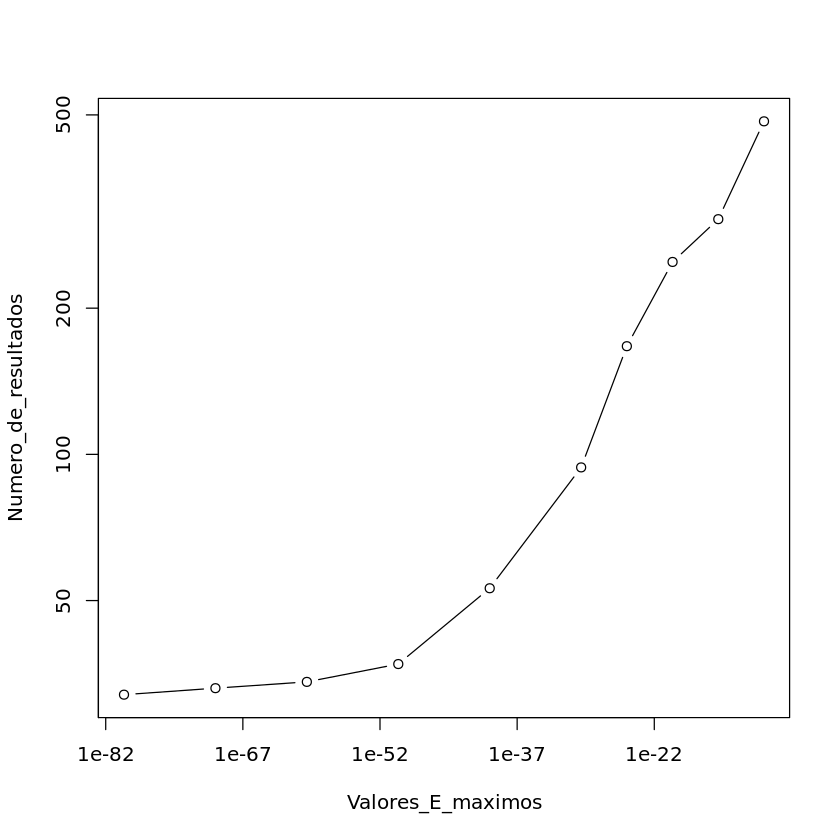

In [8]:
plot(Valores_E_maximos, Numero_de_resultados, log = 'xy', type = 'b')

In [ ]:
A continuación, se examina la relación entre la longitud del alineamiento y el valor E de los resultados guardados en la  última tabla, la número 10, en la
que se ha usado un valor E de 1.0e-10 y que contiene un mayor número de resultados(485).

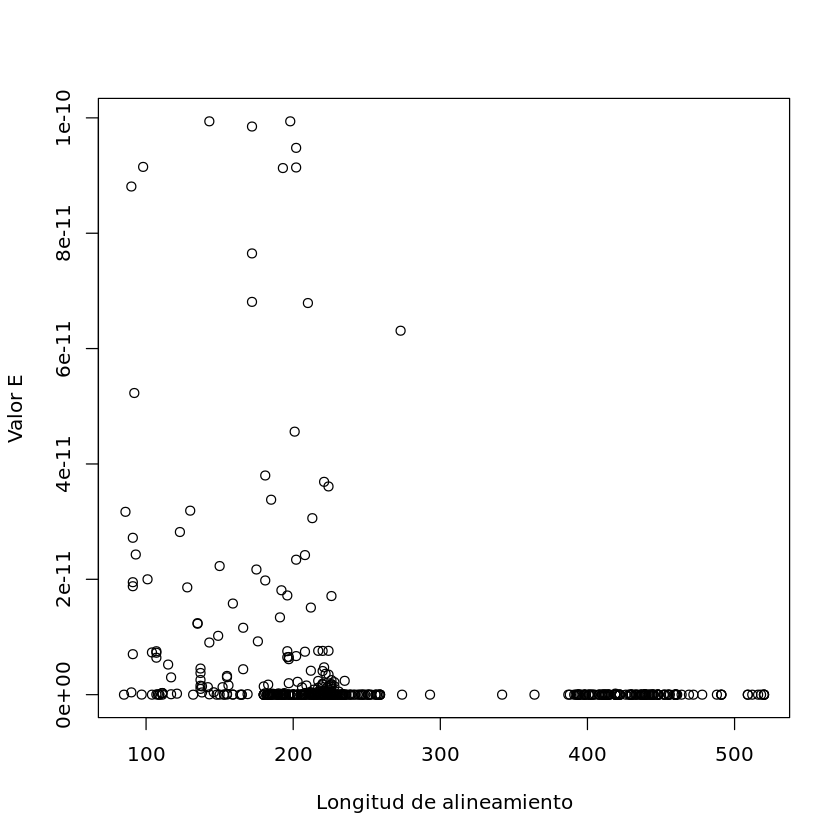

In [9]:
# El símbolo "$" extrae de un "data.frame" una columna, por lo tanto si ejecutas
# "Lista_de_Tablas[[10]]$length", se verá que el resultado es el vector
# de las longitudes de los alineamientos de la decima tabla.
plot(Lista_de_Tablas[[10]]$length, Lista_de_Tablas[[10]]$evalue,
     xlab = 'Longitud de alineamiento', ylab = 'Valor E')

In [ ]:
Aunque la proteína CHRM1 es de unos 459 aminoácidos, encontramos alineamientos entre 50-250 y 380-450 residuos. En  el primer rango, se podría estar indicando 
que en la base de datos existe un grupo de proteínas que presentan una homólogia parcial, es decir, solo se parecen a CHRM1 en un fragmento concreto;
probablemente una región conservada. Por otro lado, el rango restante podría servirnos para validar la premisa de este trabajo, ya que al presentar grados 
de homología muy elevados (82% - 98%), estas, posiblemente, tendrían la misma función.

Para ver mucho mejor como son estos alineamientos, vamos a observar la siguiente gráfica.

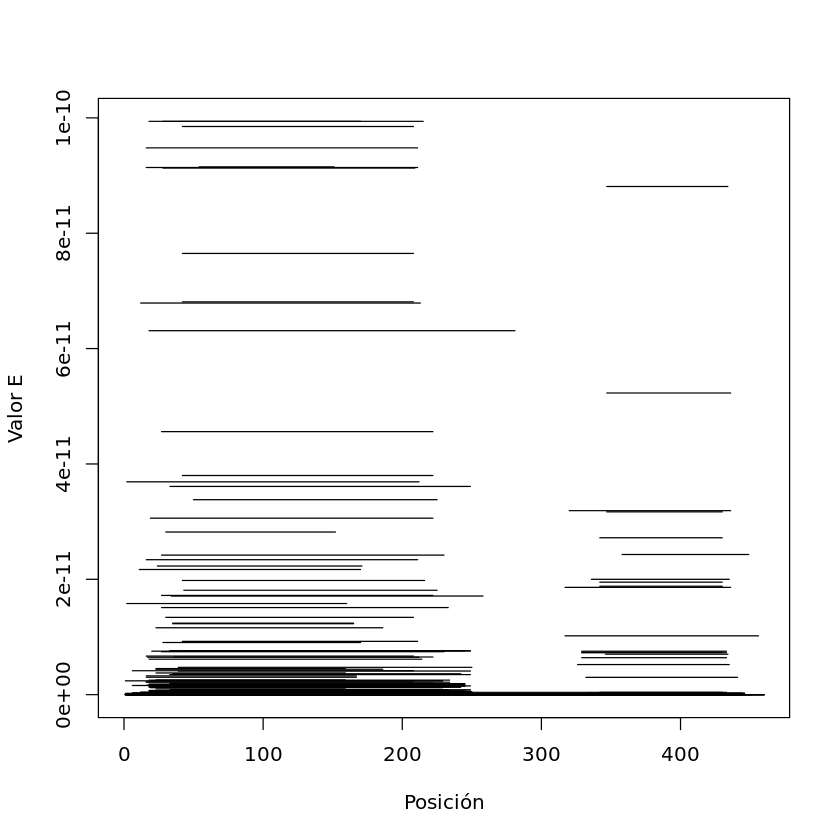

In [10]:
inicios <- Lista_de_Tablas[[10]]$qstart
finales <- Lista_de_Tablas[[10]]$qend
valoresE <- Lista_de_Tablas[[10]]$evalue

# La función segments() añade segmentos a un gráfico previo. Por eso, se representa
# antes un gráfico con los rangos adecuados, pero vacío (type='n'). Para determinar
# el rango del eje horizontal, determino primero el valor máximo de "qend".
AlineamientoMaximo <- max(Lista_de_Tablas[[10]]$qend)
plot(c(0, AlineamientoMaximo), range(valoresE), type='n', xlab='Posición', ylab='Valor E')
segments(inicios, valoresE, finales, valoresE)

In [ ]:
En esta gráfica, se visualiza de forma sencilla donde se producen estos alineamientos en la secuencia *query*, encontrándonos dos zonas a destacar. La primera
se encuentra desde el residuo 0 hasta el 250, el cual es un alineamiento muy prolongado y mayoritario, por lo que esta región podría ser la causante del dominio 
estructural que da lugar al receptor de acetilcolina en las membranas. En cambio, la segunda zona se encuentra entre los aminoácidos 320-450, una región de 
menor longitud, donde esta homología podría deberse a la existencia de un dominio estructural conservado, que podría no tener nada que ver con la recepción 
de la acetilcolina.

Para observar si esta homología se encuentra en una gran variedad de taxonomías, utilizaremos la información de la columna `sblastname`y la función `table()`
para que R nos devuelva los grupos taxonómicos de cada secuencia homóloga.

In [11]:
lapply(Lista_de_Tablas, function(x) table(x$sblastname))

[[1]]

              birds even-toed ungulates       frogs & toads            primates 
                  3                   5                   1                  13 
            rodents 
                 10 

[[2]]

              birds even-toed ungulates               flies       frogs & toads 
                  3                   5                   1                   1 
           primates             rodents 
                 13                  10 

[[3]]

              birds even-toed ungulates               flies       frogs & toads 
                  3                   5                   1                   1 
          nematodes            primates             rodents 
                  1                  13                  10 

[[4]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   1 
      frogs & toads           nematodes            primates             rod

In [ ]:
El resultado del código anterior es una lista de recuentos de los diferentes grupos taxonómicos presentes en cada tabla de resultados de **blastp**. Se puede 
observar en los resultados de la tabla 10, con un valor umbral E de 1.0e-10, una gran variedad de filos como pueden ser; los artrópodos, cordados, moluscos o 
nematodos. A pesar de que no encontramos ningún organismo perteneciente a los filos de ctenóforos, poríferos, placozoa, hongos o plantas, si que haun una proteína
vírica con un cierto grado de homología, un hecho que iría en contra de la hipótesis de Viscardi et al.(2021).

Puesto que CHRM1 es un receptor de acetilcolina, vamos a suponer que lo realmente importante y que debería ser homólogo para todas las proteínas es la región
de receptora del compuesto. Por ello, para ver la relación entre la longitud del alineamiento y la distribución taxonómica, se va a repetir el recuento pero 
contando únicamente las secuencias con un alineamiento de al menos 250 aminoácidos:

In [12]:
lapply(Lista_de_Tablas, function(x) {
       filtro <- x$length >= 250
       table(x[filtro, 'sblastname'])
    }
)

[[1]]

              birds even-toed ungulates       frogs & toads            primates 
                  3                   5                   1                  13 
            rodents 
                  8 

[[2]]

              birds even-toed ungulates               flies       frogs & toads 
                  3                   5                   0                   1 
           primates             rodents 
                 13                   8 

[[3]]

              birds even-toed ungulates               flies       frogs & toads 
                  3                   5                   0                   1 
          nematodes            primates             rodents 
                  0                  13                   8 

[[4]]

              birds         crustaceans even-toed ungulates               flies 
                  3                   1                   5                   0 
      frogs & toads           nematodes            primates             rod

In [ ]:
##Discusión
Utilizando la secuencia de la proteína CHRM1 de *Homo sapiens* como consulta (*query*) en búsquedas de **blastp**, encontramos proteínas homólogas con dos rangos
de alineamiento; el primero seria de una región alrededor de 250 aminoácidos (equivalente a un 50% de la proteína CHRM1) que se encuentra entre los residuos
0 y 250. Al ser un región tan extensa, podríamos llegar a pensar que se trata del dominio estructural que da lugar a la detección de la acetilcolina en la
membrana, y por está razón esta tan extendido. En cambio, la otra región de unos pocos más de 100 aminoácidos localizados entre los residuos 320
y 450, al ser de una extensión menor podría deberse a la existencia de un dominio conservado para proteínas receptoras.

Una vez sabido esto, para verificarlo, se podrían hacer uso de dos herramientas muy útiles, como pueden ser la base de datos Pfam para analizar las secuencias
de los alineamientos que van desde 0 y 350 hasta 250 y 450, respectivamente. Si hacemos esta búsqueda manualmente (Imagen Resultados pfam), el resultado que nos 
devuelve es que la secuencia pertenece a la familia de proteínas similares a la rodopsina, incluidas en un grupo más extenso como son los receptores acoplados
a proteínas G, dándonos alguna pista de que ambas regiones son necesarias para la función de proteínas receptoras.

Por otro lado, podemos usar el servicio de Clustal Omega donde se han realizado dos alineamientos múltiples para comprobar la importancia de estas secuencias para 
la detección de acetilcolina.
En el primer emparejamiento (Imagen E-valores bajos) entre la proteína CHRM1, Q5R949, proveniente de *Pongo abelii*, y Q9N2A3, de *Gorilla gorilla gorilla*, 
se logra ver con cierta claridad la homología en las dos zonas descritas anteriormente, de manera que podríamos confirmar su relevancia a la hora de que estas
proteínas realicen su función. 
En cambio, con el otro alineamiento (Imagen E-valores altos) entre CHRM1, Q28558, proveniente de *Ovis aries*, y P33533, proveniente de *Rattus norvegicus*,  el grado de homología es 
significativamente menor, como cabía esperar, pero las zonas homologas se encuentran en las regiones previstas, lo que parece indicar que la función de estas
también es actuar como receptores pero cada uno para su respectivo compuesto.

Por último, estos resultados pueden explicar la extensa distribución taxonómica de los homólogos de una enzima, incluso en condiciones más restrictivas, entre los filos de cordados, artrópodos o moluscos. Además confirman
la hipótesis Viscardi et al.(2021), ya que este grupo de proteínas se encuentra muy conservado a lo largo de estos filos, pero no se encuentran muestras o 
homologías en organismos ancestralmente más antiguos como los ctenóforos, poríferos, placozoa, ni en otras ramas como los hongos o las plantas.

##Referencias
-Lucas Henriques Viscardi, Danilo Oliveira Imparato, Maria Cátira Bortolini, Rodrigo Juliani Siqueira Dalmolin, Ionotropic Receptors as a Driving Force behind
Human Synapse Establishment, Molecular Biology and Evolution, Volume 38, Issue 3, March 2021, Pages 735–744